In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from acquire import acquire_all_heb_sales, erneuerbare_energie




In [2]:
df = acquire_all_heb_sales()
print(df.shape)
df.head(2)

(913000, 14)


,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


1. Convert date column to datetime format.

In [ ]:
#reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [ ]:
df.head(1)

2. Plot the distribution of sale_amount and item_price.

In [ ]:
df.plot.scatter(y='sale_amount', x='item_price')

In [ ]:
sns.boxplot(df.sale_amount)

In [ ]:
sns.boxplot(df.item_price)

3. Set the index to be the datetime variable.

In [ ]:
# sort rows by the date and then set the index as the date
df = df.sort_values('sale_date').set_index('sale_date')

4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [ ]:
df['month'] = df.index.month_name()
df['day_of_the_week'] = df.index.day_name()


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [ ]:
df['sales_total'] = df.item_price * df.sale_amount
df.head(1)

6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [ ]:
sales_df = df.resample('D')[['sales_total']].sum()
sales_df = sales_df.assign(sales_diff = df.resample('D')[['sales_total']].sum().diff())
sales_df.head()

7. Make all your work reproducible

In [5]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='thistle')
    plt.suptitle('Numeric Column Distributions')
    plt.show()

In [6]:
def make_new_columns(df):
    """makes new columns of month, day of the week, 
    and total sales which is # of items * unit price"""
    df['month'] = df.index.month_name()
    df['day_of_the_week'] = df.index.day_name()
    df['sales_total'] = df.item_price * df.sale_amount
    return df

In [7]:
def prep_heb_data(df):
    """Takes in a dataframe and sets date columns as index and as datetime"""
    #reassign the sale_date column to be a datetime type
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    # sort rows by the date and then set the index as the date
    df = df.sort_values('sale_date').set_index('sale_date')
    
    df = make_new_columns(df)
    df = change_data_types(df)
    numeric_hists(df, bins=20)
    return df

In [10]:
def change_data_types(df):
    """helper function to run numeric_hist function"""
    df = (df.astype({'sale_id': object, 
                     'store_id': object, 
                     'store_zipcode': object, 
                     'item_id': object, 
                     'item_upc12': object, 
                     'item_upc14': object, 
                     'month': 'category',
                     'day_of_the_week': 'category'}))
    return df

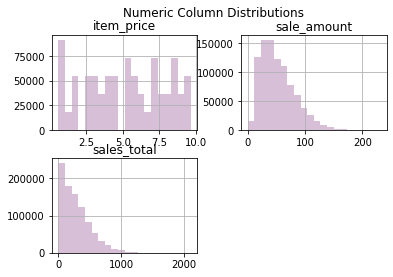

In [11]:
df = prep_heb_data(df)

# Ze Good German Data

In [13]:
datarahmen = erneuerbare_energie()
datarahmen.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


1. Convert date column to datetime format.

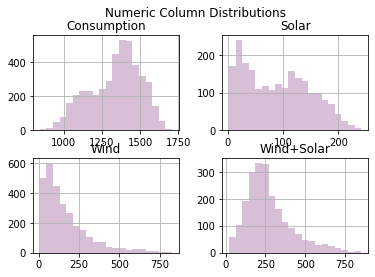

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006


In [17]:
def prep_german_energy(df):
    """function 1. sets date column to date time, sets index to date,
    returns new columns of month and year"""
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['month'] = df.index.month_name().astype('category')
    df['year'] = df.index.year.astype('category')
    numeric_hists(df)
    return df
df = prep_german_energy(datarahmen)
df.head(2)

2. Plot the distribution of each of your variables.

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df.Consumption)
axs[0, 1].hist(df.Wind)
axs[1, 0].hist(df.Solar)
axs[1, 1].hist(df['Wind+Solar'])

In [ ]:
sns.lineplot(x='Date', y='Consumption', data=df)

3.Set the index to be the datetime variable.

In [ ]:
df = df.set_index('Date')

4. Add a month and a year column to your dataframe.

In [ ]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

5. make it reproducible

## Vega-Datasets

    Install Vega data sets

In [ ]:
# pip install vega_datasets

In [ ]:
from vega_datasets import data
df = data.sf_temps()

In [ ]:
df = df.set_index('date')

In [ ]:
df.head(2)

1.  Resample by the day and take the average temperature. Visualize the average temperature over time.

In [ ]:
daily_temp = df.temp.resample("D").mean()
daily_temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.

In [ ]:
df.temp.resample("D").min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

In [ ]:
df.temp.resample("D").min().plot()

4. Which month has the highest average temperature?

In [ ]:
df.temp.resample("M").mean().nsmallest(1)

5. Which month has the highest average temperature?

In [ ]:
df.temp.resample("M").mean().nlargest(1)

6. 
    - Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    - Use this resampled dataframe to calculate the change in temperature for the day. 
    - Which month has the highest daily temperature variability?

In [ ]:
daily_temp = pd.DataFrame(df.temp.resample("D").agg(['min', 'max']))
daily_temp.head(1)

In [ ]:
daily_temp['min_diff'] = daily_temp['min'].diff(1)
daily_temp['max_diff'] = daily_temp['max'].diff(1)
daily_temp.head()

In [ ]:
daily_temp.min_diff.resample("M").agg(['min', 'max'])

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


## Use the Vega_Datasets to work with the flights_20k data

In [ ]:
df = data.flights_20k()

In [ ]:
df.head(2)

1. Convert any negative delays to 0.

In [ ]:
df.delay = df.delay.apply(lambda x: 0 if x < 0 else x)

In [ ]:
df.delay.describe()

2. Which hour of the day has the highest average delay?

In [ ]:
df = df.set_index('date')

In [ ]:
df['flight_hour'] = df.index.hour
df.groupby('flight_hour').delay.mean().nlargest(1)

In [ ]:
df.groupby('flight_hour').delay.mean().mean()